In [74]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas as pd

# load the breast_cancer dataset
init_data = load_breast_cancer()
(X, y) = load_breast_cancer(return_X_y=True)

print(init_data.keys())
print(init_data['feature_names'])
print(init_data['target_names'])

data=pd.DataFrame({
    'mean radius':init_data.data[:,0],
    'mean texture':init_data.data[:,1],
    'mean perimeter':init_data.data[:,2],
    'mean area':init_data.data[:,3],
    'mean smoothness':init_data.data[:,4],
    'benign':init_data.target
})
print(data.head())

print(X.shape)


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20

In [75]:
from sklearn.metrics import accuracy_score 
X=data[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']]
y=data['benign'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = RandomForestClassifier(criterion='gini', n_estimators=1000, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1)

mean perimeter     0.313303
mean area          0.240816
mean radius        0.204589
mean texture       0.122787
mean smoothness    0.118505
dtype: float64
<class 'pandas.core.series.Series'>


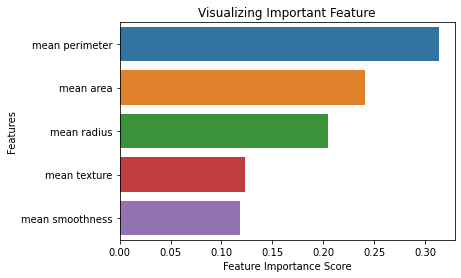

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(model.feature_importances_,index=init_data.feature_names[0:5]).sort_values(ascending=False)
print(feature_imp)
print(type(feature_imp))

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Feature')

plt.show()

In [77]:
X=data[['mean perimeter', 'mean area']]
y=data['benign'] 
numberFeatures = X.shape[1]
print(numberFeatures)
yPred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, yPred))

2
Accuracy: 0.9473684210526315


In [79]:
from sklearn.model_selection import cross_val_score
cur_score = cross_val_score(model, X_test, y_test, cv=5)
print(cur_score)
print("Average accuracy score:","{0:.2f}".format(cur_score.mean()))
Average = cur_score.mean()/numberFeatures
print("Average(accuracy per feature):","{0:.2f}".format(Average))


[0.85714286 1.         0.91176471 0.88235294 0.97058824]
Average accuracy score: 0.92
Average(accuracy per feature): 0.46
